In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [103]:
print(tf.__version__)

1.14.0


(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [94]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labes) = fashion_mnist.load_data()

In [95]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [96]:
train_images.shape

(60000, 28, 28)

In [97]:
len(train_labels)

60000

In [99]:
train_labels,test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [26]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_lables)

10000

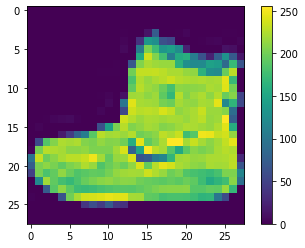

In [35]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

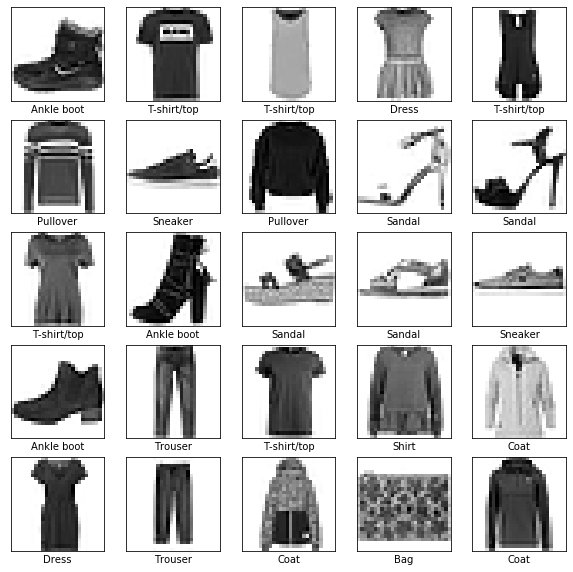

In [51]:
plt.figure(figsize=(10,10))
for _ in range(25):
    plt.subplot(5,5,_+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[_] , cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[_]])
plt.show()    

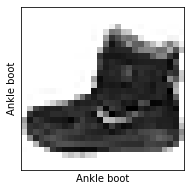

In [60]:
plt.figure(figsize=(3,3))
#for _ in range(25):
#plt.subplot(5,5,0+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0] , cmap=plt.cm.binary)
plt.xlabel(class_names[train_lables[0]])
#plt.ylabel(class_names[train_lables[0]])
plt.show()    

In [128]:
#Creating DL model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [140]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(
             from_logits=True),metrics=['accuracy'])

In [141]:
model.fit(train_images, train_lables, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.4669 - acc: 0.8432
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4633 - acc: 0.8430
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4549 - acc: 0.8469
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4512 - acc: 0.8475
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4574 - acc: 0.8464
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4443 - acc: 0.8508
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4657 - acc: 0.8479
Epoch 8/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4403 - acc: 0.8529
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4400 - acc: 0.8511
Epoch 10/10
60000/60000 [==============================] - 6s 99us/sample - l

In [142]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('\nTest accuracy is :',test_acc)

10000/10000 - 1s - loss: 0.6700 - acc: 0.8096

Test accuracy is : 0.8096


In [143]:
#test_images.size,len(test_lables)

(7840000, 10000)

In [144]:
probability_model=tf.keras.Sequential([model,
                        tf.keras.layers.Softmax()])

In [145]:
predictions = probability_model.predict(test_images)

In [146]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.4810674e-03, 0.0000000e+00, 1.3642346e-05,
       2.5235802e-36, 9.9850535e-01], dtype=float32)

In [147]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [148]:
#checkinh if matches with above
class_names[test_labels[0]]

'Ankle boot'

In [149]:
def plot_image(i, predictions_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)
    
def plot_value_array(i, predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

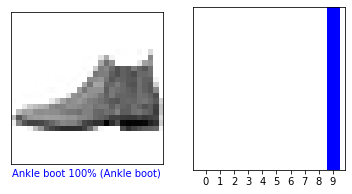

In [150]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

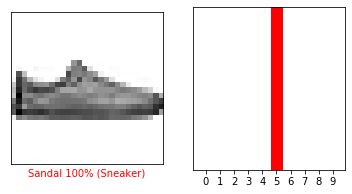

In [152]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

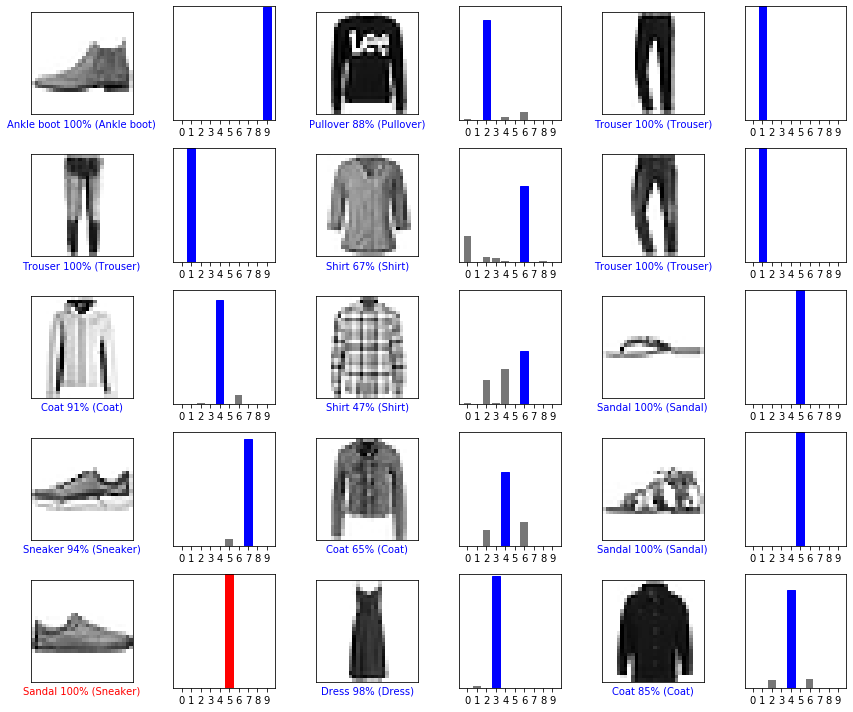

In [151]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()
    

In [155]:
img = test_images[1]

print(img.shape)

(28, 28)


In [156]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [157]:
predictions_Single = probability_model.predict(img)
print(predictions_Single)

[[1.47689665e-02 1.41809651e-04 8.81127775e-01 2.80127721e-03
  2.72147972e-02 1.55889269e-18 7.34559894e-02 0.00000000e+00
  4.89376951e-04 1.67206678e-31]]


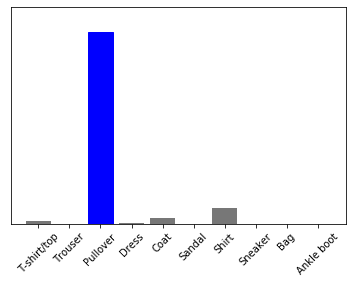

In [160]:
plot_value_array(1,predictions_Single[0],test_labels)
_ = plt.xticks(range(10), class_names,rotation=45)

In [162]:
np.argmax(predictions_Single[0])

2